In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
import tensorflow_datasets as tfds

In [ ]:

# Load the Cat vs Dog dataset
(ds_train, ds_test), ds_info = tfds.load('cats_vs_dogs',
                                         split=['train[:80%]', 'train[80%:]'],
                                         shuffle_files=True,
                                         as_supervised=True,
                                         with_info=True)


In [ ]:
# Function to get the shape of images
def get_image_shape(dataset):
    for image, label in dataset.take(1):  # Take one sample from the dataset
        print(f"Image shape: {image.shape}")
        break

# Get image shape for training set
get_image_shape(ds_train)



Image shape: (375, 500, 3)


In [ ]:
# Plot randomly 5 images
import matplotlib.pyplot as plt
def plot_images(dataset, num_images=5):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.title("Cat" if label == 0 else "Dog")
        plt.axis("off")
    plt.show()

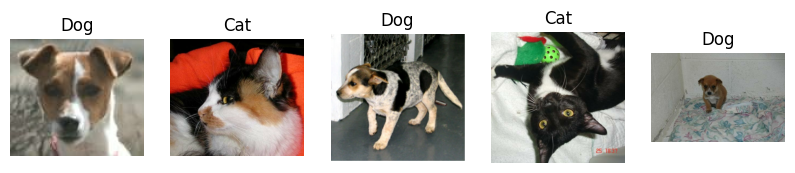

In [ ]:
# Plot 5 random images from training set
plot_images(ds_train)

In [ ]:
# Preprocessing function for resizing and normalizing images
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))  # Resize to 224x224 as expected by MobileNet
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values to [0, 1]
    return image, label

In [ ]:
# Apply the preprocessing to the datasets
ds_train = ds_train.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# MobileNet Without Transfer Learning
model_from_scratch = models.Sequential([
    MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights=None),  # No pre-trained weights
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification (cat or dog)
])

In [ ]:
# Compile the model
model_from_scratch.compile(optimizer='adam',
                           loss='binary_crossentropy',
                           metrics=['accuracy'])

# Train the model
print("Training MobileNet from scratch...")
model_from_scratch.fit(ds_train, validation_data=ds_test, epochs=5)

Training MobileNet from scratch...
Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 150s 165ms/step - accuracy: 0.6044 - loss: 0.6717 - val_accuracy: 0.4901 - val_loss: 0.8359
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 70s 120ms/step - accuracy: 0.7512 - loss: 0.5093 - val_accuracy: 0.4901 - val_loss: 1.0545
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 81s 118ms/step - accuracy: 0.8038 - loss: 0.4158 - val_accuracy: 0.4901 - val_loss: 0.8502
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 70s 120ms/step - accuracy: 0.8605 - loss: 0.3162 - val_accuracy: 0.4901 - val_loss: 0.7879
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 85s 124ms/step - accuracy: 0.8929 - loss: 0.2501 - val_accuracy: 0.4901 - val_loss: 0.7804


In [ ]:
# MobileNet With Transfer Learning
model_with_transfer = models.Sequential([
    MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet'),  # Pre-trained weights
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification (cat or dog)
])

# Compile the model
model_with_transfer.compile(optimizer='adam',
                            loss='binary_crossentropy',
                            metrics=['accuracy'])

# Train the model
print("Training MobileNet with transfer learning...")
model_with_transfer.fit(ds_train, validation_data=ds_test, epochs=5)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training MobileNet with transfer learning...
Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 129s 155ms/step - accuracy: 0.9313 - loss: 0.1689 - val_accuracy: 0.8740 - val_loss: 0.8145
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 70s 121ms/step - accuracy: 0.9655 - loss: 0.0901 - val_accuracy: 0.8313 - val_loss: 1.4088
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 72s 124ms/step - accuracy: 0.9718 - loss: 0.0709 - val_accuracy: 0.8250 - val_loss: 1.0400
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 80s 121ms/step - accuracy: 0.9763 - loss: 0.0618 - val_accuracy: 0.8923 - val_loss: 0.8938
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 83s 123ms/step - accuracy: 0.9814 - loss: 0.0517 - val_accuracy: 0.9366 - val_loss: 0.5300
